<a href="https://colab.research.google.com/github/Jkhou1000/Mushroom-Classifier/blob/main/Mushroom_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mushroom classification project**

This project will be a showcase and exploration on a dataset from the UCI
namely on mushrooms and the classification of whether or not they are edible or poisonous.

Josh Khoury

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importing basic libraries for first part of project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Stack 2/Project 2/CSVS/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#everything is an object class, matching with the data dictionary from UCI
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
print(f'NaN values:', df.isna().sum().sum())
print(f'Duplicated Values:', df.duplicated().any())
#No NAN or duplicates.

NaN values: 0
Duplicated Values: False


In [6]:
Hyops = df.dtypes[df.dtypes=='object'].index
for col in Hyops:
  print(f'Column:{col}')
  print(df[col].value_counts(dropna=True))
  print('\n\n')
#There aren't any NaN Values but one of the columns has ? which means it is techincally missing
#All of the mushrooms have the same veil type, even though there are technically two types. this data is unhelpful.

Column:class
e    4208
p    3916
Name: class, dtype: int64



Column:cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64



Column:cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64



Column:cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64



Column:bruises
f    4748
t    3376
Name: bruises, dtype: int64



Column:odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64



Column:gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64



Column:gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64



Column:gill-size
b    5612
n    2512
Name: gill-size, dtype: int64



Column:gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtyp

In [7]:
df = df.drop(columns=['veil-type'])

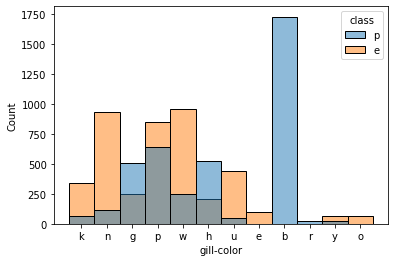

In [8]:
sns.histplot(data=df, x='gill-color', edgecolor='black',bins='auto', hue='class')
#I have this basic graph to use as a reference for labels, since I have to assign values in the graphs order

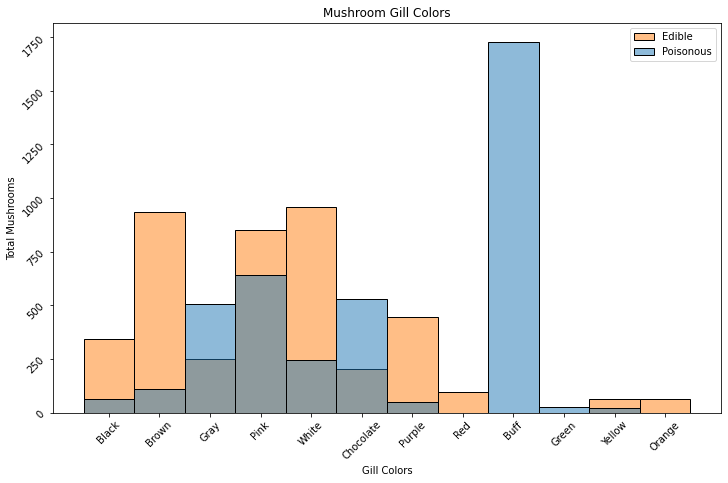

In [9]:
labels = ['Black', 'Brown', 'Gray', 'Pink', 'White', 'Chocolate', 'Purple', 'Red', 'Buff', 'Green', 'Yellow', 'Orange']
fig, ax = plt.subplots(figsize=(10,6))

#Setting Parameters
plt.tight_layout()
sns.histplot(data=df, x='gill-color', edgecolor='black',bins='auto', hue='class')
plt.ylabel('Total Mushrooms')
plt.xlabel('Gill Colors')
ax.set_xticklabels(labels=labels)
ax.set(title='Mushroom Gill Colors')
ax.tick_params(labelrotation = 45)
ax.legend(labels=['Edible', 'Poisonous'])

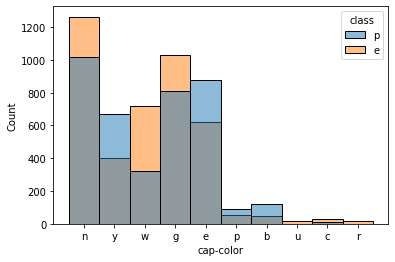

In [10]:
#Same as above, reference for labels
sns.histplot(data=df, x='cap-color', edgecolor='black',bins='auto', hue='class')

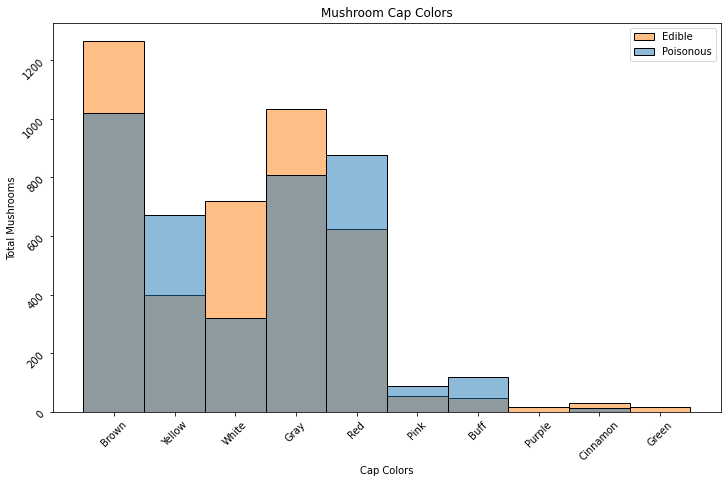

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
labels2 = ['Brown', 'Yellow', 'White',  'Gray', 'Red', 'Pink', 'Buff', 'Purple', 'Cinnamon', 'Green']

#Now to vizualize the Cap colors

plt.tight_layout()
sns.histplot(data=df, x='cap-color', edgecolor='black',bins='auto', hue='class')
plt.ylabel('Total Mushrooms')
plt.xlabel('Cap Colors')
ax.set_xticklabels(labels=labels2)
ax.set(title='Mushroom Cap Colors')
ax.tick_params(labelrotation = 45)
ax.legend(labels=['Edible', 'Poisonous'])

#**Histogram Analysis**

####Based on the Histograms above, we can make several broad observations about the data. For starters, Cap colors by itself is not a great metric for telling if a mushroom is edible, except for a select few which are exclusively Edible(The green and purple caps)

####The Gill colors aren't much more precise but notably has an abundance of gills with buff coloring in the samples we have, and all of them are poisonous, while the few with red and orange ones are edible

In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
#I am one hot encoding my dataframe in order to plot out multivariate analyses 
df_ohe = ohe.fit_transform(df)


df_ohe = pd.DataFrame(df_ohe, columns=ohe.get_feature_names_out())
df_ohe[:5]


,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_ohe.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_means = df_ohe.groupby('class_p', as_index=False).mean()
df_caps = df_means.loc[:, df_means.columns.str.startswith('cap')]
df_capshape = df_means.loc[:, df_means.columns.str.contains('cap-shape')]
df_capcolor = df_means.loc[:, df_means.columns.str.contains('cap-color')]

In [15]:
df_means.head()

,class_p,class_e,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,1.0,0.096008,0.000000,0.379278,0.054183,0.007605,0.462928,0.370722,0.000000,...,0.209125,0.283270,0.252852,0.446768,0.334601,0.057034,0.060837,0.032319,0.022814,0.045627
1,1.0,0.0,0.012257,0.001021,0.397344,0.153218,0.000000,0.436159,0.194076,0.001021,...,0.093973,0.727273,0.165475,0.323800,0.188968,0.151175,0.009193,0.257406,0.069459,0.000000


#*Data Preprocessing*

The above code is being used for analysis down below on the two barplots(Not the countplots), since it is incredibly difficult to get the type of anaylsis I need since every single feature is object class, I OneHotEncode everything and convert it into a dataframe. since everything has been converted into a binary

Afterwards I use groupby functions and aggregate it by mean to grab floats that act as a percentage of the data I am evaluating

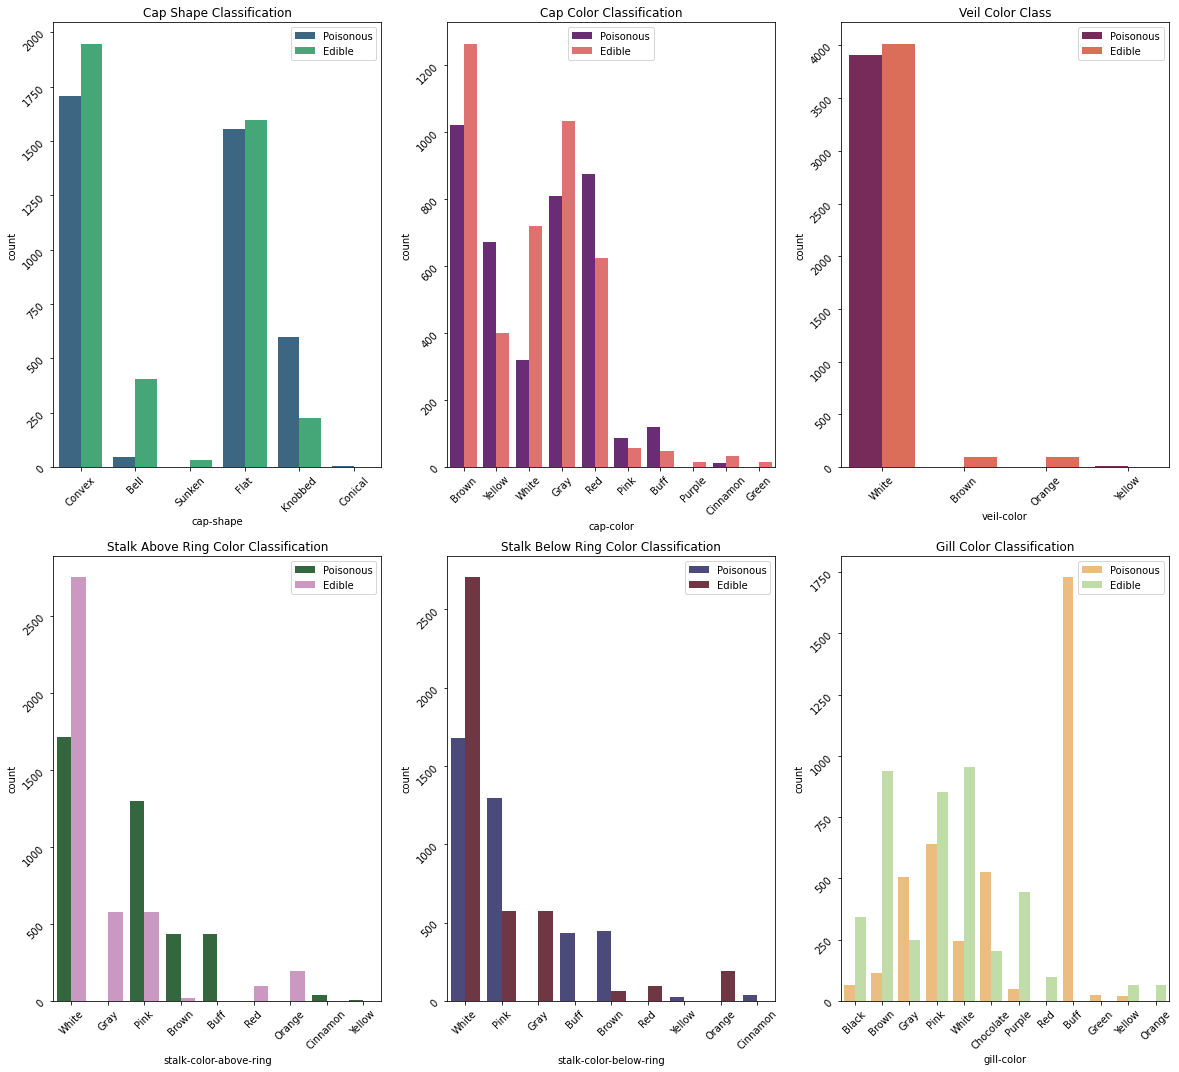

In [16]:
#A countplot to give me basic info on certain features first
fig, axes = plt.subplots(2,3, figsize=(20, 18))
axes = axes.ravel()
#Labels for the new plots are here. Ive made a couple for the histograms above so I don't need to reassign all of them
labels3 = ['Convex', "Bell", "Sunken", 'Flat', 'Knobbed', 'Conical']
labels4 = ['White', 'Brown', 'Orange', "Yellow"]
labels5 = ['White', 'Gray', 'Pink', 'Brown', 'Buff', 'Red', 'Orange', 'Cinnamon', 'Yellow']
labels6 = ['White', 'Pink', 'Gray', 'Buff', 'Brown', 'Red', 'Yellow', 'Orange', 'Cinnamon']
#Countplots for exploring multiple variables edibility
sns.countplot(data=df, x='cap-shape', hue='class', palette='viridis',ax=axes[0]).set_title("Cap Shape Classification")
sns.countplot(data=df, x='cap-color', hue='class', palette='magma', ax=axes[1]).set_title('Cap Color Classification')
sns.countplot(data=df, x='veil-color', hue='class', palette='rocket', ax=axes[2]).set_title('Veil Color Class')
sns.countplot(data=df, x='stalk-color-above-ring', hue='class', palette='cubehelix', ax=axes[3]).set_title('Stalk Above Ring Color Classification')
sns.countplot(data=df, x='stalk-color-below-ring', hue='class', palette='icefire', ax=axes[4]).set_title('Stalk Below Ring Color Classification')
sns.countplot(data=df, x='gill-color', hue='class', palette='Spectral', ax=axes[5]).set_title("Gill Color Classification")

axes[0].set_xticklabels(labels3)
axes[0].tick_params(labelrotation=45)
axes[0].legend(labels=['Poisonous', 'Edible'])
axes[1].set_xticklabels(labels2)
axes[1].tick_params(labelrotation=45)
axes[1].legend(labels=['Poisonous', 'Edible'])
axes[2].set_xticklabels(labels4)
axes[2].tick_params(labelrotation=45)
axes[2].legend(labels=['Poisonous', 'Edible'])
axes[3].set_xticklabels(labels5)
axes[3].tick_params(labelrotation=45)
axes[3].legend(labels=['Poisonous', 'Edible'], loc='upper right')
axes[4].set_xticklabels(labels6)
axes[4].tick_params(labelrotation=45)
axes[4].legend(labels=['Poisonous', 'Edible'], loc='upper right')
axes[5].set_xticklabels(labels)
axes[5].tick_params(labelrotation=45)
axes[5].legend(labels=['Poisonous', 'Edible'], loc='upper right');

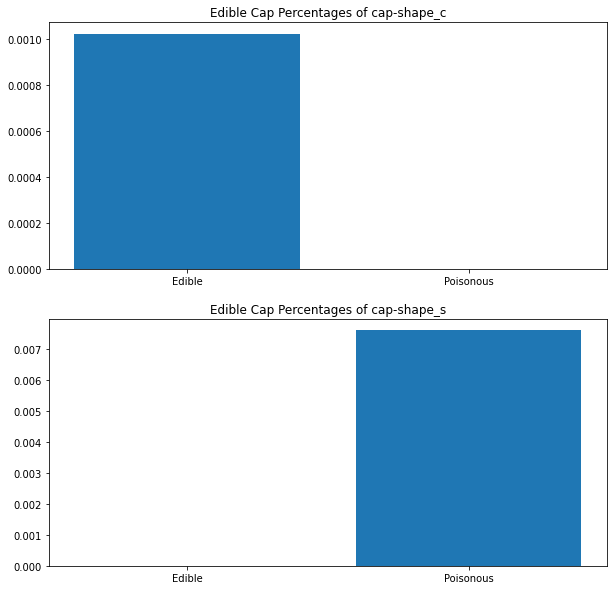

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
ax = ax.ravel()
#Enumerating through important cap-shapes
for i, col in enumerate(['cap-shape_c', 'cap-shape_s']):
  ax[i].bar(df_means['class_e'], df_means[col])
  ax[i].set_title(f'Edible Cap Percentages of {col}')
  ax[i].set_xticks([0,1])
  ax[i].set_xticklabels({'Edible',"Poisonous"})

#the small percentage of mushrooms with cap-shape_c "Conical" are Poisonous
#The .007 mushrooms with cap shape s "Sunken" are Edible

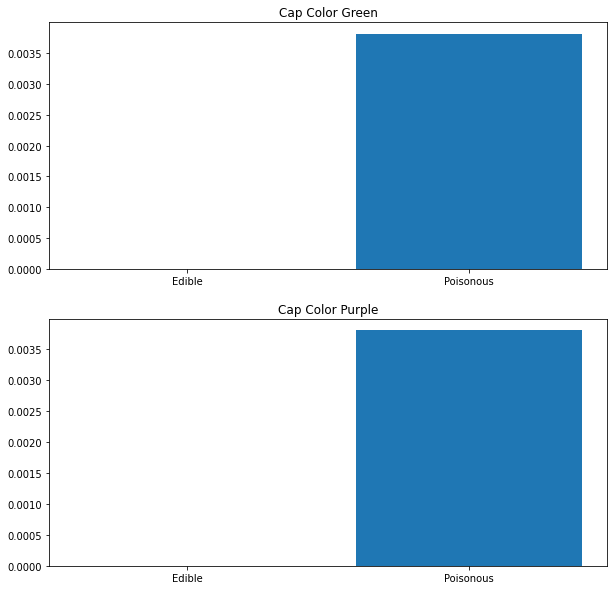

In [18]:
fig, ax = plt.subplots(2, figsize=(10,10))
ax = ax.ravel()
#Now we look at cap colors
for i, col in enumerate(['cap-color_r', 'cap-color_u']):
  ax[i].bar(df_means['class_e'], df_means[col])
  ax[i].set_xticks([0,1])
  ax[i].set_xticklabels({'Edible', 'Poisonous'})
  ax[0].set_title('Cap Color Green')
  ax[1].set_title('Cap Color Purple')
#From here we can see that all the mushrooms with Green and Purple Cap Colors are Edible

#*Barplot & Countplot Analysis*
For the above countplot I visualized several different features, some of which I covered, but brought here for comparison and as a cleaner look. 

One noticeable point to make is that the stalk color above and below the ring are nearly identical in terms of color and classification. This tells me that for the over 90% of the stalk colors are the same, and seperating them seems superfluous. 

Stalk colors are also fairly solid in classifying if a mushroom is edible, all the Gray, Red and Orange stalks are Edible, and Buff, Cinnamon, and Yellow are poisonous. Most brown stalks are poisonous as well, and although a few are edible they are vastly outweighed by the poisnous ones.

The barplots highlight the percentages of mushrooms based on their features.
going back to Cap Colors, .7% of the mushrooms have colors that are exclusively edible, the aforementioned purple & green caps. Capshape is a bit more varied, .7% of the  mushrooms are sunken shaped caps and edible, while .10% of the mushrooms here are poisonous and conical. 

In [19]:
df.info()
#Based on data from above I will be engineering a couple of these features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [20]:
df['stalk-colors-above-below-ring'] = df['stalk-color-above-ring'] + df['stalk-color-below-ring']
df.drop(columns=['stalk-color-above-ring', 'stalk-color-below-ring'], inplace=True)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,stalk-colors-above-below-ring
0,p,x,s,n,t,p,f,c,n,k,...,e,s,s,w,o,p,k,s,u,ww
1,e,x,s,y,t,a,f,c,b,k,...,c,s,s,w,o,p,n,n,g,ww
2,e,b,s,w,t,l,f,c,b,n,...,c,s,s,w,o,p,n,n,m,ww
3,p,x,y,w,t,p,f,c,n,n,...,e,s,s,w,o,p,k,s,u,ww
4,e,x,s,g,f,n,f,w,b,k,...,e,s,s,w,o,e,n,a,g,ww


In [21]:
df['stalk-surface-above-below-ring'] = df['stalk-surface-above-ring'] + df['stalk-surface-below-ring']
df.drop(columns=['stalk-surface-above-ring', 'stalk-surface-below-ring'], inplace=True)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,veil-color,ring-number,ring-type,spore-print-color,population,habitat,stalk-colors-above-below-ring,stalk-surface-above-below-ring
0,p,x,s,n,t,p,f,c,n,k,e,e,w,o,p,k,s,u,ww,ss
1,e,x,s,y,t,a,f,c,b,k,e,c,w,o,p,n,n,g,ww,ss
2,e,b,s,w,t,l,f,c,b,n,e,c,w,o,p,n,n,m,ww,ss
3,p,x,y,w,t,p,f,c,n,n,e,e,w,o,p,k,s,u,ww,ss
4,e,x,s,g,f,n,f,w,b,k,t,e,w,o,e,n,a,g,ww,ss


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   class                           8124 non-null   object
 1   cap-shape                       8124 non-null   object
 2   cap-surface                     8124 non-null   object
 3   cap-color                       8124 non-null   object
 4   bruises                         8124 non-null   object
 5   odor                            8124 non-null   object
 6   gill-attachment                 8124 non-null   object
 7   gill-spacing                    8124 non-null   object
 8   gill-size                       8124 non-null   object
 9   gill-color                      8124 non-null   object
 10  stalk-shape                     8124 non-null   object
 11  stalk-root                      8124 non-null   object
 12  veil-color                      8124 non-null   

In [23]:
#IMporting libraries for modeling and processing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay, confusion_matrix


In [24]:
X = df.drop(columns=['class'])
y = df['class']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [25]:
#Models and Preprocessors
LogReg= LogisticRegression(random_state=42)
KNN = KNeighborsClassifier()
Rand= RandomForestClassifier(random_state=42)
#Reinstating OHE and other processors 
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
scl = StandardScaler()
pca = PCA()
#transformer 1
ohe_scl = make_pipeline(ohe, scl)

{0.0001: 0.9709502708025604, 0.001: 1.0, 0.01: 1.0, 0.1: 1.0, 1: 1.0, 10: 1.0, 100: 1.0, 1000: 1.0}
{0.0001: 0.5120630231413097, 0.001: 0.879862136878385, 0.01: 0.999015263417036, 0.1: 1.0, 1: 1.0, 10: 1.0, 100: 1.0, 1000: 1.0}


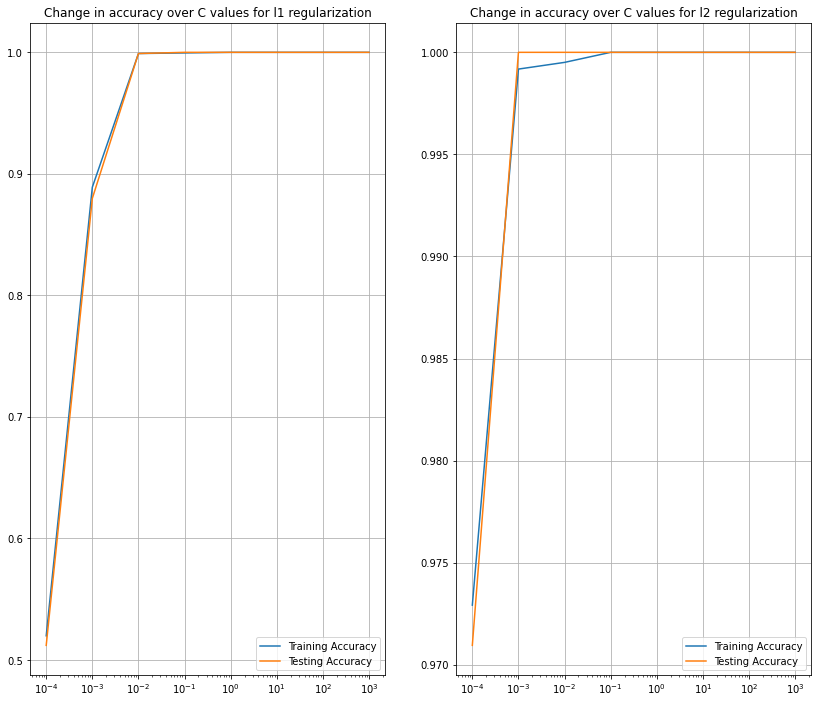

In [26]:
C_val1 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
C_val2 = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
trainsc1 = []
testsc1 = []
trainsc2 = []
testsc2 = []
for c in C_val1:

  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1', random_state=42)
  log_reg_pipe = make_pipeline(ohe_scl, log_reg)
  log_reg_pipe.fit(Xtrain, ytrain)
  trainsc1.append(log_reg_pipe.score(Xtrain, ytrain))
  testsc1.append(log_reg_pipe.score(Xtest, ytest))

for c in C_val2:

  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2', random_state=42)
  log_reg_pipe = make_pipeline(ohe_scl, log_reg)
  log_reg_pipe.fit(Xtrain, ytrain)
  trainsc2.append(log_reg_pipe.score(Xtrain, ytrain))
  testsc2.append(log_reg_pipe.score(Xtest, ytest))



fig, ax = plt.subplots(1,2, figsize=(14,12))
ax[0].plot(C_val1, trainsc1, label='Training Accuracy')
ax[0].plot(C_val1, testsc1, label='Testing Accuracy')
ax[0].set_xticks(C_val1)
ax[0].set_title('Change in accuracy over C values for l1 regularization')
ax[0].grid(True)
ax[0].legend()
ax[0].set_xscale('log')
ax[1].plot(C_val2, trainsc2, label='Training Accuracy')
ax[1].plot(C_val2, testsc2, label='Testing Accuracy')
ax[1].set_xticks(C_val2)
ax[1].set_title('Change in accuracy over C values for l2 regularization')
ax[1].legend()
ax[1].grid(True)
ax[1].set_xscale('log')
print({c:score for c, score in zip(C_val2, testsc2)})
print({c:score for c, score in zip(C_val1, testsc1)})

#L1 and L2 Accuracy

The Above Graphs show the accuracy values for Logistic Regression Tuning. According to this, both penalties will still end up giving an accuracy of 1.0. L1 reaches perfect accuracy on more C Values than L2 does but it doesn't matter so long as I use the proper C value

In [27]:
K_params = {'kneighborsclassifier__n_neighbors': range(3, 5, 8),
            'kneighborsclassifier__p':range(1,3),
            'kneighborsclassifier__weights': ['distance', 'uniform']}

In [28]:
knn_pipe = make_pipeline(ohe_scl, KNN)
knn_gs = GridSearchCV(knn_pipe, K_params)

knn_gs.fit(Xtrain, ytrain)
print('Best KNN Params')
print(knn_gs.best_params_)
best_knn = knn_gs.best_estimator_
print(f'Accuracy of best model: {best_knn.score(Xtest, ytest)}')

Best KNN Params
{'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'distance'}
Accuracy of best model: 1.0


In [29]:
rf_params = {'randomforestclassifier__max_depth': [1,2,3],
             'randomforestclassifier__min_samples_leaf': [1, 5, 10, 15],
             'randomforestclassifier__min_samples_split': [2, 10, 50],
             'randomforestclassifier__n_estimators': [50, 100, 200]}
rf_pipe = make_pipeline(ohe_scl, Rand)            
rf_gs = GridSearchCV(rf_pipe, rf_params)

rf_gs.fit(Xtrain, ytrain)
print("Best Random Forest Classifier Params")
print(rf_gs.best_params_)
best_rf = rf_gs.best_estimator_
print(f'Accuracy of best RF Model:{best_rf.score(Xtest, ytest)}')

Best Random Forest Classifier Params
{'randomforestclassifier__max_depth': 3, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 50}
Accuracy of best RF Model:0.9911373707533235


In [30]:
scl_df = ohe_scl.fit_transform(Xtrain, ytrain)

In [31]:
pca.fit(scl_df)

PCA()

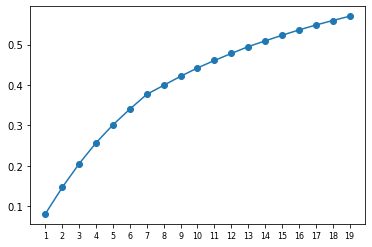

In [32]:
plt.plot(range(1,20), pca.explained_variance_ratio_.cumsum()[:19], marker='o')
plt.xticks(ticks=range(1,20), fontsize=8);
#Cumulative variance seems to level off around 7-9
#Next I visualize the Scree plot

Text(0, 0.5, 'Explained Variance Proportion')

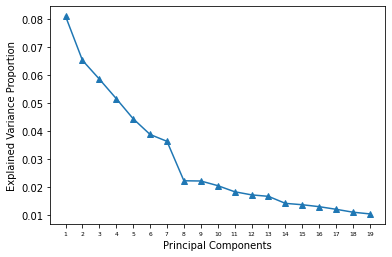

In [33]:
plt.plot(range(1,20), pca.explained_variance_ratio_[:19], marker='^')
plt.xticks(ticks = range(1,20), fontsize=6)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Proportion')
#8 seems like a good amount

In [34]:
pca8 = PCA(n_components=8)
transformer = make_pipeline(ohe_scl, pca8)
Log_pipe = make_pipeline(ohe_scl, LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2', random_state=42))
Log_pipe2 = make_pipeline(transformer, LogisticRegression(random_state=42))
knn_pipe = make_pipeline(ohe_scl, best_knn)
knn_pipe2 = make_pipeline(transformer, best_knn)
RF_pipe1 = make_pipeline(transformer, best_rf)
RF_pipe2 = make_pipeline(ohe_scl, best_rf)

In [35]:
#Classification reports without PCA
Log_pipe.fit(Xtrain, ytrain)
print(f'Logistic Regression Report', classification_report(ytest.values, Log_pipe.predict(Xtest)))
RF_pipe2.fit(Xtrain, ytrain)
print(f'Random Forest Report', classification_report(ytest.values, RF_pipe2.predict(Xtest)))
knn_pipe.fit(Xtrain, ytrain)
print(f'KNN Report', classification_report(ytest.values, knn_pipe.predict(Xtest)))

Logistic Regression Report               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1040
           p       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Random Forest Report               precision    recall  f1-score   support

           e       0.98      1.00      0.99      1040
           p       1.00      0.98      0.99       991

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031

KNN Report               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1040
           p       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg   

In [36]:
#2 Classification reports with PCA, KNN keeps crashing the notebook everytime I try to print a report directly
Log_pipe2.fit(Xtrain, ytrain)
print(f'Logistic Regression Report', classification_report(ytest.values, Log_pipe2.predict(Xtest)))
RF_pipe1.fit(Xtrain, ytrain)
print(f'Random Forest Report', classification_report(ytest.values, RF_pipe1.predict(Xtest)))


Logistic Regression Report               precision    recall  f1-score   support

           e       0.93      0.97      0.95      1040
           p       0.97      0.92      0.95       991

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031

Random Forest Report               precision    recall  f1-score   support

           e       0.51      1.00      0.68      1040
           p       0.00      0.00      0.00       991

    accuracy                           0.51      2031
   macro avg       0.26      0.50      0.34      2031
weighted avg       0.26      0.51      0.35      2031



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


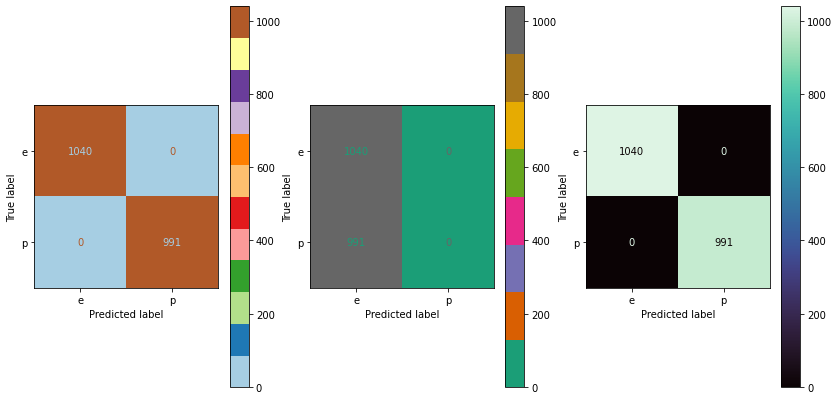

In [37]:
fig, axes = plt.subplots(1,3, figsize=(14,7))
#Confusion Matrix display to show the predictions
Log_pipe.fit(Xtrain, ytrain)
ConfusionMatrixDisplay.from_predictions(ytest.values, Log_pipe.predict(Xtest), cmap='Paired', ax=axes[0])
RF_pipe1.fit(Xtrain, ytrain)
ConfusionMatrixDisplay.from_predictions(ytest.values, RF_pipe1.predict(Xtest), cmap='Dark2', ax=axes[1])
knn_pipe.fit(Xtrain, ytrain)
ConfusionMatrixDisplay.from_predictions(ytest.values, knn_pipe.predict(Xtest), cmap='mako', ax=axes[2])


In [38]:
best_model=Log_pipe['logisticregression']
best_model

LogisticRegression(C=1000, max_iter=1000, random_state=42, solver='liblinear')

In [39]:
coef = best_model.coef_
coef

array([[ 0.11434505,  0.13484156, -0.01856231,  0.06377323, -0.25493867,
        -0.0464768 , -0.51827041,  0.116769  ,  0.35032339,  0.14177694,
         0.27212284, -0.29888074, -0.10142076,  0.04178986, -0.24909719,
         0.13790444, -0.12650688, -0.14308621,  0.41081104, -0.08128477,
        -0.05931581,  0.05931581, -1.28177573,  1.86511838,  1.79476844,
        -1.27856471,  0.11723431, -2.40929466,  1.94737334,  0.63302815,
         0.63577862, -0.21245527,  0.21245527,  0.59155243, -0.59155243,
        -1.06011215,  1.06011215,  0.93411262, -0.2633031 , -0.18054079,
         0.18232585, -0.22453765, -0.34470705, -0.10039624, -0.23190947,
         0.17331921, -0.16638345, -0.14463015, -0.07602835,  0.18019436,
        -0.18019436,  0.16513949,  0.75353484, -0.7754919 , -0.63066682,
        -0.26952007, -0.18621662, -0.17530601,  0.20306702,  0.21889791,
         0.11723431,  0.86425645, -0.91941571,  0.11754842, -1.09713242,
         0.57960669,  0.11723431, -0.38093269, -0.1

In [ ]:
Log_pipe[:-1].get_feature_names_out()

In [41]:
coef_df = pd.DataFrame(coef, columns=Log_pipe[:-1].get_feature_names_out())
coef_df.T.abs().sort_values(by=0, ascending=False).head(10)
#the dataframe here is showing the top 10 most important features used by my Logistic Regression model used to determine its class.

,0
odor_n,2.409295
odor_p,1.947373
odor_c,1.865118
odor_f,1.794768
spore-print-color_r,1.767682
spore-print-color_h,1.625574
stalk-surface-above-below-ring_ky,1.552905
odor_a,1.281776
odor_l,1.278565
spore-print-color_n,1.278199


#**Final thoughts**

###Applying PCA had made all the models worse in some manner. I put both KNN and Logreg back to normal since they had perfect accuracy, but left Random Forest alone to show the effect it has on the model since it was the one that didn't have perfect accuracy or precision.

###The final code here is being used to transform coeffecients into absolute values and assigning them to the proper corresponding features. After that they are sorted by descending order to determine which values are the most important in how the Logistic Regression model determines its predictions. In this case Odor and spore print colors are the most important ones being in the top 10

###Of the two models which were perfect I would recommend Logistic Regression, as even in its default state still gives it 100% accuracy and works for this binary classification problem, while KNN needed to be tuned and would take longer for larger datasets.